# Discretization

In [52]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer


In [53]:
# Load Dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [54]:
# Handle missing values in 'age' column
df['age'] = df['age'].fillna(df['age'].median())

# KBinsDiscretizer

In [64]:
age_discretizer = KBinsDiscretizer(n_bins=3, encode = 'ordinal', strategy='uniform')
df['age_bins'] = age_discretizer.fit_transform(df[['age']]).astype(int)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


<Axes: xlabel='age', ylabel='Count'>

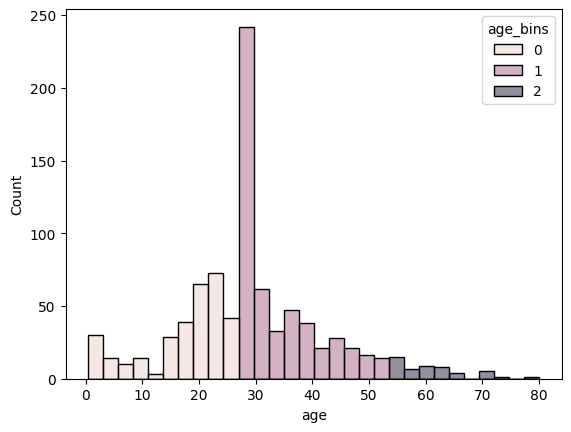

In [65]:
sns.histplot(df, x= 'age', hue='age_bins')

# Discretization using PANDAS

In [61]:
bins = [0, 10, 18, 30, 50, 80]
labels = ['child', 'teenage', 'adult', 'elder', 'old']
df['age_bins'] = pd.cut(df['age'], bins, labels)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bins
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,"(18, 30]"
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(30, 50]"
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,"(18, 30]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(30, 50]"
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,"(18, 30]"
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(18, 30]"
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,"(18, 30]"
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(18, 30]"


<Axes: xlabel='age', ylabel='Count'>

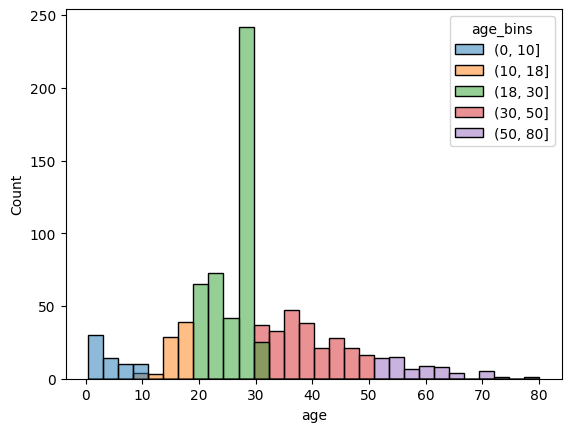

In [59]:
sns.histplot(df,x='age',hue='age_bins')